Initial Accuracy (n_estimators=10): 0.8182

Best Accuracy: 0.8335 with 80 estimators.


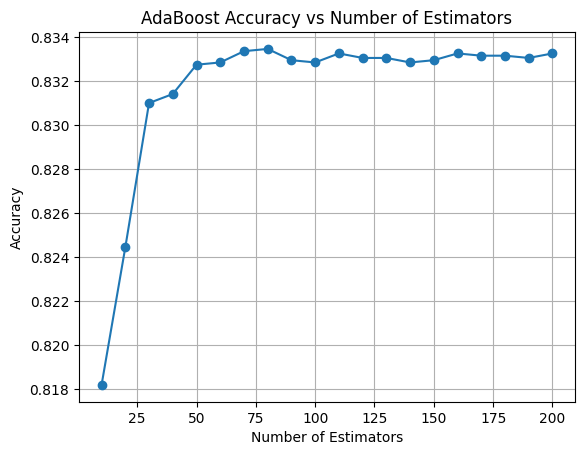

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv("income.csv")  # Ensure the CSV file is in the same directory

# Step 2: Handle preprocessing
# You may need to adjust this depending on the dataset's structure
# This example assumes the last column is the target and others are features
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Handle categorical variables (if any)
X = pd.get_dummies(X)

# Step 3: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Build initial AdaBoost classifier with 10 estimators
model = AdaBoostClassifier(n_estimators=10, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
initial_score = accuracy_score(y_test, y_pred)
print(f"Initial Accuracy (n_estimators=10): {initial_score:.4f}")

# Step 5: Fine-tune number of estimators
best_score = 0
best_n = 0
scores = []

for n in range(10, 201, 10):  # Vary number of estimators
    model = AdaBoostClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    scores.append((n, score))
    if score > best_score:
        best_score = score
        best_n = n

print(f"\nBest Accuracy: {best_score:.4f} with {best_n} estimators.")

# Plotting accuracy vs number of estimators
n_values, acc_values = zip(*scores)
plt.plot(n_values, acc_values, marker='o')
plt.title("AdaBoost Accuracy vs Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Final model with best number of estimators
final_model = AdaBoostClassifier(n_estimators=best_n, random_state=42)
final_model.fit(X_train, y_train)
final_pred = final_model.predict(X_test)

# Accuracy and Confusion Matrix
final_accuracy = accuracy_score(y_test, final_pred)
conf_matrix = confusion_matrix(y_test, final_pred)

print(f"\nBest Accuracy: {final_accuracy:.4f} using {best_n} estimators")
print("Confusion Matrix:")
print(conf_matrix)



Best Accuracy: 0.8335 using 80 estimators
Confusion Matrix:
[[7130  284]
 [1343 1012]]
